In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data=pd.read_csv('Housing_Price_data_set.csv')
data['num_driveway']=data.driveway.map({'yes':1,'no':0})
data['num_recroom']=data.recroom.map({'yes':1,'no':0})
data['num_fullbase']=data.fullbase.map({'yes':1,'no':0})
data['num_gashw']=data.gashw.map({'yes':1,'no':0})
data['num_airco']=data.airco.map({'yes':1,'no':0})
data['num_prefarea']=data.prefarea.map({'yes':1,'no':0})
X=data[['lotsize','bedrooms','bathrms','stories','num_driveway','num_recroom','num_fullbase','num_gashw','num_airco','garagepl','num_prefarea']].values
Y=data[['price']].values

#Mean Normalization
X=(X-np.mean(X))/np.std(X)
Y=(Y-np.mean(Y))/np.std(Y)

In [6]:
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=50,test_size=.3)
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

theta = np.matrix(np.zeros(12))
print(theta)

#set gradient parameters
alpha = 0.01
iters = 10000

(164, 12)
(164, 1)
(382, 12)
(382, 1)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


parameters after gradient descent= [[-0.31201252  0.22385437  0.0904532   0.09079023  0.09100656  0.09045408
   0.09063603  0.0905283   0.09048319  0.09083362  0.0908532   0.09065369]]


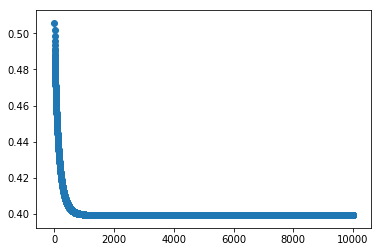

total squared error is
0.7157367654009816


In [7]:
##gradient descent based on 70% of the data set

var=100
def gradientDescent(X,Y,theta,iters,alpha):
    cost=[]
    xTrans=X.transpose()
    for i in range(0,iters):
        hypothesis=X*theta.T
        loss=hypothesis-Y
        cost.append(np.sum(np.power(loss,2))/(2*len(X)))
        #if i>0:
            #print("iteration=",i,"| cost=",cost[i])
        gradient=(loss.T*X)/len(X)
        theta=theta-(alpha*(gradient+var/len(X)*theta))
        #print(theta)
    return theta,cost

g,cost=gradientDescent(x_train,y_train,theta,iters,alpha)
print("parameters after gradient descent=",g)
it=np.arange(0,iters)
plt.plot(it,np.array(cost))
plt.scatter(it,np.array(cost))
#plt.ylim([3.0,4.0])
plt.show()

##calculating sum of squared error of the test data
tempy=np.matmul(x_test,g.transpose())
diff=tempy-y_test
print("total squared error is")
tsse=(np.mean(np.power(diff,2)))
print(tsse)

parameters after gradient descent= [[-0.5848375   0.37900657  0.17450523  0.17501759  0.17818519  0.17071102
   0.17145451  0.17158816  0.17008154  0.17391457  0.17429542  0.17197108]]


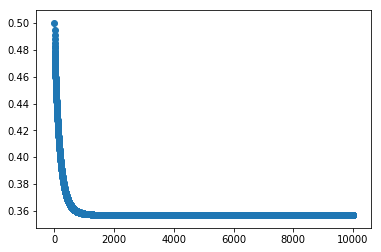

total squared error is
0.7135421151029215


In [8]:

##gradient descent based on entire data set
var=10
def gradientDescent(X,Y,theta,iters,alpha):
    cost=[]
    xTrans=X.transpose()
    for i in range(0,iters):
        hypothesis=X*theta.T
        loss=hypothesis-Y
        cost.append(np.sum(np.power(loss,2))/(2*len(X)))
        #if i>0:
            #print("iteration=",i,"| cost=",cost[i])
        gradient=(loss.T*X)/len(X)
        theta=theta-(alpha*(gradient+var/len(X)*theta))
    return theta,cost

g,cost=gradientDescent(X,Y,theta,iters,alpha)
print("parameters after gradient descent=",g)
it=np.arange(0,iters)
plt.plot(it,np.array(cost))
plt.scatter(it,np.array(cost))
#plt.ylim([3.0,4.0])
plt.show()

##calculating sum of squared error over the entire dataset
tempy=np.matmul(X,g.transpose())
diff=tempy-Y
print("total squared error is")
tsse=(np.mean(np.power(diff,2)))
print(tsse)

